In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("Dataset.csv")

In [3]:
train_data.head()
train_data.info()
train_data.isnull().any()
train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   CROP         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [4]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1:]
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

X train shape:  (2200, 7)
y train shape:  (2200, 1)


In [5]:
x = np.array([1,23,5,564,56,876,7,-123])

standardized_X = (x - np.mean(x)) / np.std(x)
normalized_X = (x-np.min(x) / np.max(x) - np.min(x))
print("Standardized array: ",standardized_X)
print("Normalized array: ",normalized_X )

Standardized array:  [-0.53531619 -0.46806733 -0.52308913  1.18564322 -0.36719405  2.13935429
 -0.5169756  -0.91435521]
Normalized array:  [1.24140411e+02 1.46140411e+02 1.28140411e+02 6.87140411e+02
 1.79140411e+02 9.99140411e+02 1.30140411e+02 1.40410959e-01]


In [6]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
x = x.reshape(-1,1)  # for sklearn methods. they use two dimensional vectors
x = stds.fit_transform(x)

In [7]:
class NeuralNet(object):
    def __init__(self):
        # Generate random numbers
        np.random.seed(1)
        
        # Assign random weights to a 3 * 1 matrix
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1
        
    # The sigmoid function method
    def _sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    # Derivative sigmoid
    def derivative_sigmoid(self, x):
        return x * (1 - x)
    
    # Train the neural network and adjust the weights each time
    def train(self, inputs, outputs, iteration_number):
        for iteration in range(iteration_number):     
        
            # Pass the training set through network
            output = self.learn(inputs)
        
            # Calculate the error
            error = outputs - output
        
            # Adjust the weights by a factor
            factor = np.dot(inputs.T, error * self.derivative_sigmoid(output))
            self.synaptic_weights += factor
        
    # calculate z    
    def learn(self, test_inputs):
        return self._sigmoid(np.dot(test_inputs, self.synaptic_weights))

In [8]:
# Initialize
neural_net = NeuralNet()

# The training set
inputs = np.array([[0, 1, 1], [1, 0, 0], [1, 0, 1]])
outputs = np.array([[1, 0, 1]]).T

# train the neural network
neural_net.train(inputs, outputs, 50)

test_inputs = np.array([1, 0, 1])
threshold = 0.5
if neural_net.learn(test_inputs) >= threshold:
    print("Our test example output is: 1")
else:
    print("Our test example output is: 0")

Our test example output is: 1


In [9]:
# transform into dummies for y_train (prognosis variable)
y_train_dum = pd.get_dummies(y_train)
y_train_dum

,CROP_Apple,CROP_Banana,CROP_Blackgram,CROP_ChickPea,CROP_Coconut,CROP_Coffee,CROP_Cotton,CROP_Grapes,CROP_Jute,CROP_KidneyBeans,...,CROP_Mango,CROP_MothBeans,CROP_MungBean,CROP_Muskmelon,CROP_Orange,CROP_Papaya,CROP_PigeonPeas,CROP_Pomegranate,CROP_Rice,CROP_Watermelon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2196,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2197,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2198,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential   # used for initialize ANN model
from tensorflow.keras import layers   # used for different layer structure
from tensorflow.keras.layers import Dense

In [11]:
classifier = Sequential()

In [12]:
# adding first hidden layer with input layer. there is init parameter that represents how to initialize weights
classifier.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
# adding second hidden layer
classifier.add(Dense(32, activation = "relu"))
classifier.add(Dense(16, activation = "relu"))
# adding last layer
classifier.add(Dense(y_train_dum.shape[1], activation = "softmax"))

In [13]:
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 22)                374       
                                                                 
Total params: 3,494
Trainable params: 3,494
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = classifier.fit(X_train, y_train_dum, epochs = 100, batch_size = 2)

Epoch 1/100
1100/1100 [==============================] - 9s 6ms/step - loss: 2.5618 - accuracy: 0.2273
Epoch 2/100
1100/1100 [==============================] - 7s 6ms/step - loss: 1.7549 - accuracy: 0.4282
Epoch 3/100
1100/1100 [==============================] - 8s 7ms/step - loss: 1.1260 - accuracy: 0.6332
Epoch 4/100
1100/1100 [==============================] - 7s 6ms/step - loss: 0.6561 - accuracy: 0.7709
Epoch 5/100
1100/1100 [==============================] - 7s 7ms/step - loss: 0.4525 - accuracy: 0.8282
Epoch 6/100
1100/1100 [==============================] - 7s 6ms/step - loss: 0.3557 - accuracy: 0.8723
Epoch 7/100
1100/1100 [==============================] - 8s 7ms/step - loss: 0.3067 - accuracy: 0.8805
Epoch 8/100
1100/1100 [==============================] - 8s 7ms/step - loss: 0.2902 - accuracy: 0.8927
Epoch 9/100
1100/1100 [==============================] - 7s 7ms/step - loss: 0.2289 - accuracy: 0.9077
Epoch 10/100
1100/1100 [==============================] - 7s 7ms/step - l

1100/1100 [==============================] - 5s 4ms/step - loss: 0.0796 - accuracy: 0.9714
Epoch 80/100
1100/1100 [==============================] - 5s 4ms/step - loss: 0.0738 - accuracy: 0.9700
Epoch 81/100
1100/1100 [==============================] - 5s 4ms/step - loss: 0.0974 - accuracy: 0.9632
Epoch 82/100
1100/1100 [==============================] - 4s 4ms/step - loss: 0.1006 - accuracy: 0.9664
Epoch 83/100
1100/1100 [==============================] - 4s 3ms/step - loss: 0.0699 - accuracy: 0.9723
Epoch 84/100
1100/1100 [==============================] - 4s 3ms/step - loss: 0.0691 - accuracy: 0.9709
Epoch 85/100
1100/1100 [==============================] - 4s 3ms/step - loss: 0.1175 - accuracy: 0.9595
Epoch 86/100
1100/1100 [==============================] - 4s 3ms/step - loss: 0.0881 - accuracy: 0.9659
Epoch 87/100
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0938 - accuracy: 0.9682
Epoch 88/100
1100/1100 [==============================] - 4s 4ms/step - loss:

In [15]:
#history.history["accuracy"]

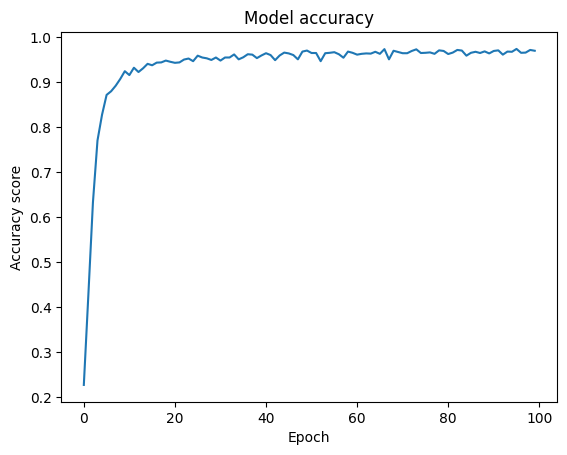

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

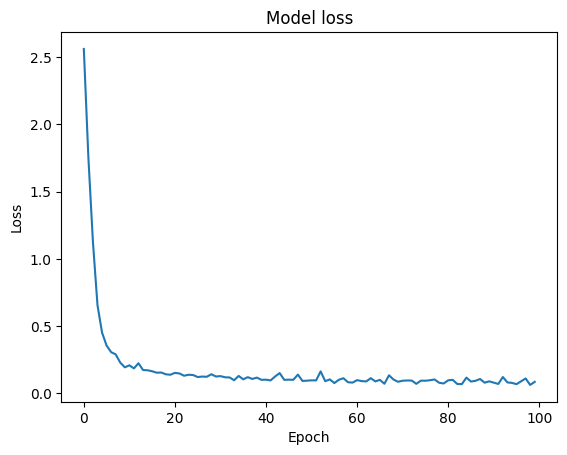

In [17]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [18]:
from keras.models import load_model
classifier.save('t1.h5')
model = load_model('t1.h5')

In [19]:
#!pip install gradio

In [20]:
'''import gradio as gr
import h5py as h5
f = h5.File("/content/t1.h5", "r")
datasetNames = [n for n in f.keys()]
for n in datasetNames:
    print(n)'''

'import gradio as gr\nimport h5py as h5\nf = h5.File("/content/t1.h5", "r")\ndatasetNames = [n for n in f.keys()]\nfor n in datasetNames:\n    print(n)'

In [21]:
'''import pickle
with open("Tri_Hack.pkl", "wb") as f:
  pickle.dump(classifier, f)''' 

'import pickle\nwith open("Tri_Hack.pkl", "wb") as f:\n  pickle.dump(classifier, f)'

In [22]:
'''with open("Tri_Hack.pkl", "rb") as f:
	classifier  = pickle.load(f)'''

'with open("Tri_Hack.pkl", "rb") as f:\n\tclassifier  = pickle.load(f)'

In [23]:
def make_prediction(nit, phs, pot, temp, hum, ph, rain):
    with open("Tri_Hack.pkl", "rb") as f:
        history  = pickle.load(f)
        model = load_model('t1.h5')
        #preds = history.predict([[nit, phs, pot, temp, hum, ph, rain]])
        preds2 = model.predict([[nit, phs, pot, temp, hum, ph, rain]]) 
        #print(preds)
        #print("\n")
        print(preds2)
  
        max = 0
        for i in range(22) :
          if preds2[0][i] > max :
            max = preds2[0][i]
            ans = i

        print(preds2[0][ans])

        if ans == 0:
                return "Rice"
        elif ans == 1:
                return "Maize"
        elif ans == 2:
                return "Chickpea"
        elif ans == 3:
                return "Kidney_Beans"
        elif ans == 4:
                return "Pigeon_Peas"
        elif ans == 5:
                return "Moth_Beans"
        elif ans == 6:
                return "Mung_Beans"
        elif ans == 7:
                return "Blackgram"
        elif ans == 8:
                return "lentil"
        elif ans == 9:
                return "Pomegranate"
        elif ans == 10:
                return "Banana"
        elif ans == 11:
                return "Mango"
        elif ans == 12:
                return "Grapes"
        elif ans == 13:
                return "Watermelon"
        elif ans == 14:
                return "Muskmelon"
        elif ans == 15:
                return "Apple"
        elif ans == 16:
                return "Orange"
        elif ans == 17:
                return "Papaya"
        elif ans == 18:
                return "Coconut"
        elif ans == 19:
                return "Cotton"
        elif ans == 20:
                return "Jute"
        elif ans == 21:
                return "Coffee"
        else :
          return "Nothing" 

#make_prediction(80.23, 40.23, 40.12, 20.34, 80.11, 7.03, 202.34)

nit_input = gr.Number(label = "Enter Nitrogen Value")
phs_input = gr.Number(label = "Enter Phosphorus Value")
pot_input = gr.Number(label = "Enter Potassium Value")
temp_input = gr.Number(label = "Enter Temperature Value")
hum_input = gr.Number(label = "Enter Humidity Value")
ph_input = gr.Number(label = "Enter Ph Value")
rain_input = gr.Number(label = "Enter Rainfall Value")

# We create the output
output = gr.Textbox()

app = gr.Interface(fn = make_prediction, inputs=[nit_input, phs_input, pot_input, temp_input, hum_input, ph_input, rain_input], outputs=output)
app.launch()


'def make_prediction(nit, phs, pot, temp, hum, ph, rain):\n    with open("Tri_Hack.pkl", "rb") as f:\n        history  = pickle.load(f)\n        model = load_model(\'t1.h5\')\n        #preds = history.predict([[nit, phs, pot, temp, hum, ph, rain]])\n        preds2 = model.predict([[nit, phs, pot, temp, hum, ph, rain]]) \n        #print(preds)\n        #print("\n")\n        print(preds2)\n  \n        max = 0\n        for i in range(22) :\n          if preds2[0][i] > max :\n            max = preds2[0][i]\n            ans = i\n\n        print(preds2[0][ans])\n\n        if ans == 0:\n                return "Rice"\n        elif ans == 1:\n                return "Maize"\n        elif ans == 2:\n                return "Chickpea"\n        elif ans == 3:\n                return "Kidney_Beans"\n        elif ans == 4:\n                return "Pigeon_Peas"\n        elif ans == 5:\n                return "Moth_Beans"\n        elif ans == 6:\n                return "Mung_Beans"\n        elif ans == 